In [1]:
# !pip install rdkit

In [2]:
import pandas as pd

In [3]:
# 1. 读取数据
!ls ../data

1-s2.0-S0167732222024916-mmc1.docx
amino_acids_hydrate_data.csv
amino_acids_hydrate_data_update1.csv
bioactivity_preprocessed_data.csv
house_tiny.csv
inhibitor_amino_acids_data.csv
inhibitor_data.csv


In [4]:
df = pd.read_csv('../data/bioactivity_preprocessed_data.csv')
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL353472,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,100000.0,inactive
1,CHEMBL170095,CCC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C...,100000.0,inactive
2,CHEMBL353210,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,100000.0,inactive
3,CHEMBL329145,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,2600.0,intermediate
4,CHEMBL172226,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C[S+](C)[O-...,8500.0,intermediate


In [5]:
# 2. 计算描述符
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [6]:
df_lipinski = lipinski(df.canonical_smiles)

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,379.526,1.3538,3.0,4.0
1,347.459,1.4008,3.0,3.0
2,379.526,1.3107,4.0,4.0
3,365.499,0.9206,4.0,4.0
4,385.511,-0.7470,4.0,5.0
5,404.536,1.4019,5.0,4.0
6,353.444,-0.7447,5.0,5.0
7,369.512,0.2375,4.0,5.0
8,372.516,0.3771,4.0,6.0
9,408.549,0.7188,5.0,5.0


In [8]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL353472,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,100000.0,inactive
1,CHEMBL170095,CCC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C...,100000.0,inactive
2,CHEMBL353210,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,100000.0,inactive
3,CHEMBL329145,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,2600.0,intermediate
4,CHEMBL172226,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C[S+](C)[O-...,8500.0,intermediate
5,CHEMBL426028,CNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CC(...,430.0,active
6,CHEMBL172892,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)CS)C...,100000.0,inactive
7,CHEMBL170913,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CSC)NC(=O)CS,650.0,active
8,CHEMBL170021,CNC(=O)[C@H](Cc1cscn1)NC(=O)[C@H](CC(C)C)NC(=O)CS,430.0,active
9,CHEMBL369024,CNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CSC...,810.0,active


In [9]:
# 3. 合并
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL353472,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,100000.0,inactive,379.526,1.3538,3.0,4.0
1,CHEMBL170095,CCC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C...,100000.0,inactive,347.459,1.4008,3.0,3.0
2,CHEMBL353210,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,100000.0,inactive,379.526,1.3107,4.0,4.0
3,CHEMBL329145,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,2600.0,intermediate,365.499,0.9206,4.0,4.0
4,CHEMBL172226,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C[S+](C)[O-...,8500.0,intermediate,385.511,-0.7470,4.0,5.0
5,CHEMBL426028,CNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CC(...,430.0,active,404.536,1.4019,5.0,4.0
6,CHEMBL172892,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)CS)C...,100000.0,inactive,353.444,-0.7447,5.0,5.0
7,CHEMBL170913,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CSC)NC(=O)CS,650.0,active,369.512,0.2375,4.0,5.0
8,CHEMBL170021,CNC(=O)[C@H](Cc1cscn1)NC(=O)[C@H](CC(C)C)NC(=O)CS,430.0,active,372.516,0.3771,4.0,6.0
9,CHEMBL369024,CNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CSC...,810.0,active,408.549,0.7188,5.0,5.0


In [10]:
# 4. 转换目标值为log函数
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [11]:
df_combined.standard_value.describe()

count        38.000000
mean      12439.473684
std       30627.596155
min          39.000000
25%         118.250000
50%         508.500000
75%        7493.500000
max      100000.000000
Name: standard_value, dtype: float64

In [12]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [13]:
df_norm = norm_value(df_combined)
df_norm

C:\Users\59631\AppData\Local\Temp\ipykernel_2720\3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL353472,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,inactive,379.526,1.3538,3.0,4.0,100000.0
1,CHEMBL170095,CCC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C...,inactive,347.459,1.4008,3.0,3.0,100000.0
2,CHEMBL353210,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,inactive,379.526,1.3107,4.0,4.0,100000.0
3,CHEMBL329145,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,intermediate,365.499,0.9206,4.0,4.0,2600.0
4,CHEMBL172226,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C[S+](C)[O-...,intermediate,385.511,-0.7470,4.0,5.0,8500.0
5,CHEMBL426028,CNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CC(...,active,404.536,1.4019,5.0,4.0,430.0
6,CHEMBL172892,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)CS)C...,inactive,353.444,-0.7447,5.0,5.0,100000.0
7,CHEMBL170913,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CSC)NC(=O)CS,active,369.512,0.2375,4.0,5.0,650.0
8,CHEMBL170021,CNC(=O)[C@H](Cc1cscn1)NC(=O)[C@H](CC(C)C)NC(=O)CS,active,372.516,0.3771,4.0,6.0,430.0
9,CHEMBL369024,CNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H](CSC...,active,408.549,0.7188,5.0,5.0,810.0


In [14]:
df_norm.standard_value_norm.describe()

count        38.000000
mean      12439.473684
std       30627.596155
min          39.000000
25%         118.250000
50%         508.500000
75%        7493.500000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [15]:
df_final = pIC50(df_norm)
df_final.head()

C:\Users\59631\AppData\Local\Temp\ipykernel_2720\4027486149.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL353472,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,inactive,379.526,1.3538,3.0,4.0,4.000000
1,CHEMBL170095,CCC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C...,inactive,347.459,1.4008,3.0,3.0,4.000000
2,CHEMBL353210,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,inactive,379.526,1.3107,4.0,4.0,4.000000
3,CHEMBL329145,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,intermediate,365.499,0.9206,4.0,4.0,5.585027
4,CHEMBL172226,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C[S+](C)[O-...,intermediate,385.511,-0.7470,4.0,5.0,5.070581


In [16]:
df_final.pIC50.describe()

count    38.000000
mean      6.098037
std       1.046218
min       4.000000
25%       5.140262
50%       6.296703
75%       6.928415
max       7.408935
Name: pIC50, dtype: float64

In [17]:
# 删除中等活性的
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class.head(3)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL353472,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,inactive,379.526,1.3538,3.0,4.0,4.0
1,CHEMBL170095,CCC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)C...,inactive,347.459,1.4008,3.0,3.0,4.0
2,CHEMBL353210,CNC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=...,inactive,379.526,1.3107,4.0,4.0,4.0


In [18]:
# 5. 数据分析
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

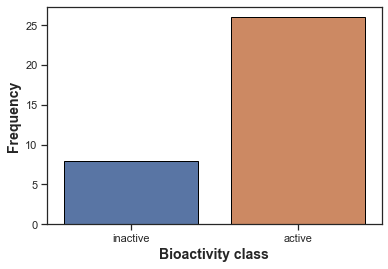

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
# plt.savefig('plot_bioactivity_class.pdf')

In [20]:
!ls

1-s2.0-S0167732222024916-mmc1.docx
ML_11_Inhibitors_data.ipynb
ML_12_Inhibitors_data_analysis.ipynb
ML_13_Inhibitors_amino_acids_1.ipynb
ML_14_Inhibitors_amino_acids_2.ipynb
ML_14_Inhibitors_amino_acids_3.ipynb
ML_15_DeepLearning_1.ipynb
ML_15_DeepLearning_2.ipynb
ML_15_DeepLearning_3.ipynb
ML_15_DeepLearning_4.ipynb
ML_16_DeepLearning_1.ipynb
ML_16_DeepLearning_2.ipynb
ML_16_DeepLearning_3.ipynb
ML_17_DeepLearning_1.ipynb
amino_acids_hydrate_data.csv
amino_acids_hydrate_data_update1.csv
bioactivity_preprocessed_data.csv
inhibitor_amino_acids_data.csv
inhibitor_data.csv


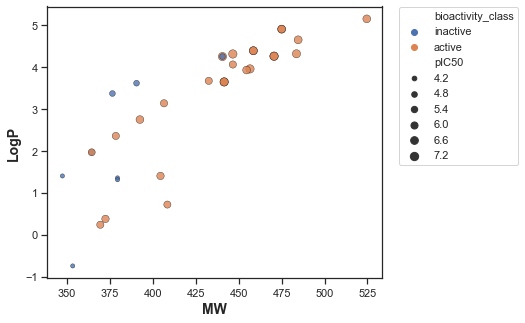

In [21]:
# 质量与LogP的散点图
plt.figure(figsize=(6, 5))
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.8)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
# plt.savefig('plot_MW_vs_LogP.pdf')

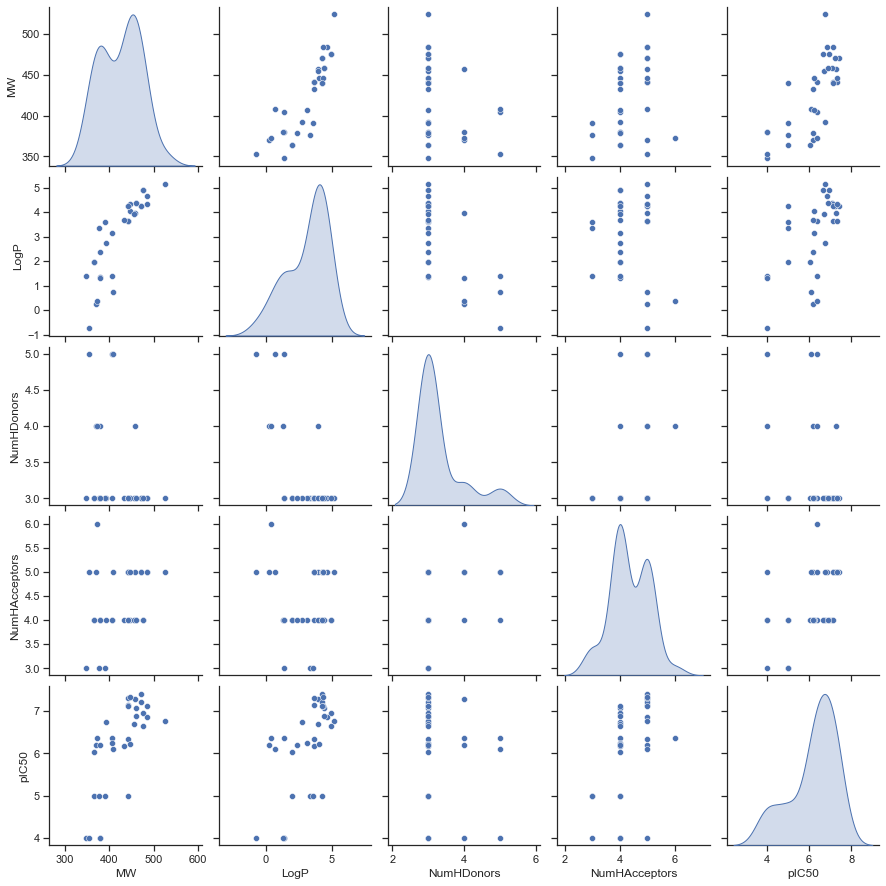

In [22]:
sns.pairplot(df_2class,diag_kind='kde')

In [23]:
# 统计分析Mann-Whitney U Test
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  # results.to_csv(filename)

  return results

In [24]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.000013,0.05,Different distribution (reject H0)


Text(0, 0.5, 'MW')

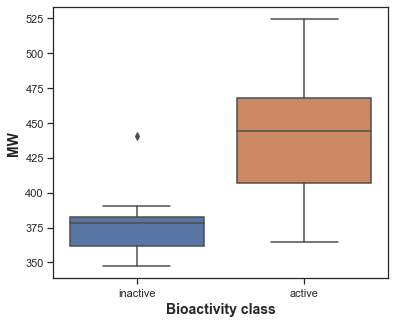

In [25]:
plt.figure(figsize=(6, 5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

# plt.savefig('plot_MW.pdf')

In [26]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,25.0,0.000713,0.05,Different distribution (reject H0)


Text(0, 0.5, 'LogP')

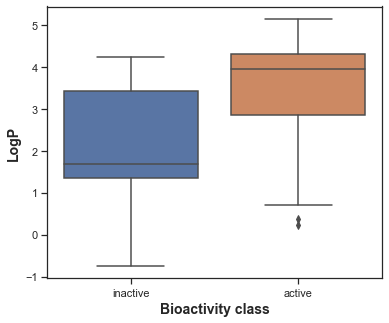

In [27]:
plt.figure(figsize=(6, 5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

# plt.savefig('plot_LogP.pdf')

In [28]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,45.0,0.008746,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHDonors')

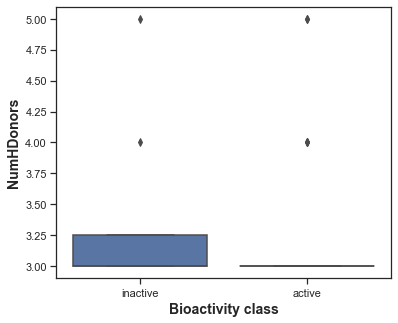

In [29]:
plt.figure(figsize=(6, 5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

# plt.savefig('plot_NumHDonors.pdf')

In [30]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,97.5,0.364887,0.05,Same distribution (fail to reject H0)


Text(0, 0.5, 'NumHAcceptors')

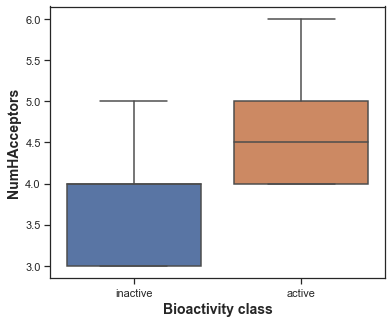

In [31]:
plt.figure(figsize=(6, 5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

# plt.savefig('plot_NumHAcceptors.pdf')

In [32]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,45.0,0.004341,0.05,Different distribution (reject H0)
